### Shehryar sohail, i200429 J

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from itertools import permutations
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Downloads/Housing.csv')
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


### Univariate analysis on Length

In [3]:
length = df.length

In [4]:
print('Central Tendency\n')

print('Mean:', length.mean())
print('Median:', length.median())
print('Multi-mode:', st.multimode(length))

Central Tendency

Mean: 539.1357798165137
Median: 528.0
Multi-mode: [365, 435]


In [5]:
print('Dispersion\n')

print('Range:', length.max()-length.min())
print('Variance:', st.variance(length))

Dispersion

Range: 500
Variance: 22009.029324069077


In [6]:
q3, q1 = np.percentile(length, [75 ,25])
print('Interquartile range:', q3-q1)

Interquartile range: 267.0


In [7]:
print('Standard deviation:', st.stdev(length))

Standard deviation: 148.35440446467734


In [8]:
print('Zscore')
stats.zscore(length)

Zscore


0      0.363412
1      1.314711
2     -0.277535
3     -1.060165
4     -0.243801
         ...   
540   -0.466446
541   -0.284282
542   -1.114139
543    0.208235
544   -0.081878
Name: length, Length: 545, dtype: float64

### Using a classifier

In [9]:
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
label_encoder = LabelEncoder()

In [11]:
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['basement']= label_encoder.fit_transform(df['basement'])
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['prefarea']= label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,1,0,0,0,1,2,1,0
1,3123904,390488,734,532,4,4,4,1,0,0,0,1,3,0,0
2,1519896,379974,498,763,3,2,2,1,0,1,0,0,2,1,1
3,1152112,288028,382,754,4,2,2,1,0,1,0,1,3,1,0
4,887292,221823,503,441,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,1,0,1,0,0,2,0,2
541,483084,241542,497,486,3,1,1,0,0,0,0,0,0,0,1
542,364276,182138,374,487,2,1,1,1,0,0,0,0,0,0,2
543,734160,367080,570,644,3,1,1,0,0,0,0,0,0,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
...     df.drop('furnishingstatus', axis = 1), df.furnishingstatus, test_size=0.33, random_state=42)

In [13]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_predict))

Accuracy: 0.40555555555555556


### Normalizing data and applying model

In [14]:
scaler = MinMaxScaler()

X_trainn = scaler.fit_transform(X_train)
X_testt = scaler.transform(X_test)

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=6, min_samples_leaf=5)   
clf_model.fit(X_trainn,y_train)

y_predict = clf_model.predict(X_testt)

print('Accuracy:', accuracy_score(y_test,y_predict))

Accuracy: 0.4166666666666667


### Plotting the area w.r.t to its independent variables in 2D and 3D

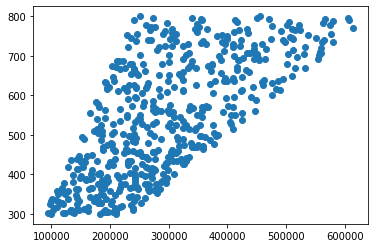

In [15]:
plt.scatter(df.area, df.length)
plt.show()

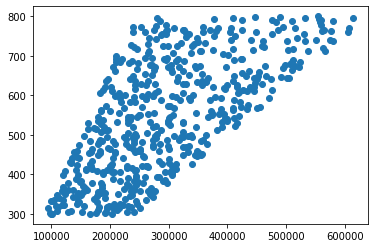

In [16]:
plt.scatter(df.area, df.width)
plt.show()

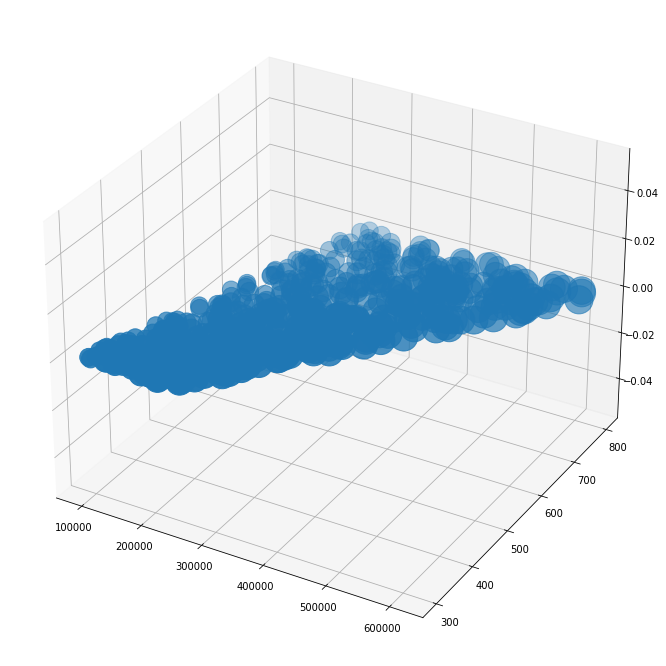

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
plt.scatter(df.area, df.length, df.width)
plt.show()

### Covariance and Correlation

In [18]:
df.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,4.450867e+11,4.583381e+10,4.310565e+07,3.927680e+07,165328.693915,92595.758473,428502.452199,16290.657771,9679.578703,-54998.854351,1957.561218,69790.104270,-31758.893497,2336.707555,-49329.123125
area,4.583381e+10,1.277520e+10,1.166981e+07,1.106981e+07,2824.302348,2429.217451,-47.240657,-2295.722646,-169.882960,-2791.234822,81.220015,-802.483945,-12170.047052,-2157.056024,-2169.406166
length,4.310565e+07,1.166981e+07,2.200903e+04,-4.514160e+02,7.842978,3.021725,1.111016,-2.517546,1.567701,-1.345467,-1.612858,6.304496,-3.987729,0.298934,-0.002132
width,3.927680e+07,1.106981e+07,-4.514160e+02,2.090209e+04,-0.069954,2.335486,0.790070,-1.291335,-2.176825,-3.605117,1.537962,-6.097865,-16.660719,-4.610193,-3.953842
bedrooms,1.653287e+05,2.824302e+03,7.842978e+00,-6.995413e-02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,-0.069256
bathrooms,9.259576e+04,2.429217e+03,3.021725e+00,2.335486e+00,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,-0.054921
stories,4.285025e+05,-4.724066e+01,1.111016e+00,7.900702e-01,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.069135
mainroad,1.629066e+04,-2.295723e+03,-2.517546e+00,-1.291335e+00,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,-0.041601
guestroom,9.679579e+03,-1.698830e+02,1.567701e+00,-2.176825e+00,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,-0.034491
basement,-5.499885e+04,-2.791235e+03,-1.345467e+00,-3.605117e+00,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,-0.041025


In [19]:
df.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831


### Correlation of length and area and their plot

In [20]:
df.length.corr(df.area), np.corrcoef(df.length, df.area)

(0.6959524284375517,
 array([[1.        , 0.69595243],
        [0.69595243, 1.        ]]))

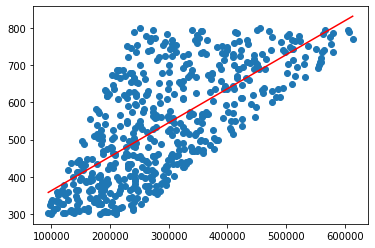

In [21]:
plt.scatter(df.area, df.length)
plt.plot(np.unique(df.area), np.poly1d(np.polyfit(df.area, df.length, 1))(np.unique(df.area)), color='red')
plt.show()

### State Space

In [22]:
cities = ['A', 'B', 'C', 'D', 'E']

In [23]:
for i in permutations(cities, 3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'C', 'E')
('A', 'D', 'B')
('A', 'D', 'C')
('A', 'D', 'E')
('A', 'E', 'B')
('A', 'E', 'C')
('A', 'E', 'D')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'A', 'E')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'C', 'E')
('B', 'D', 'A')
('B', 'D', 'C')
('B', 'D', 'E')
('B', 'E', 'A')
('B', 'E', 'C')
('B', 'E', 'D')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'A', 'E')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'B', 'E')
('C', 'D', 'A')
('C', 'D', 'B')
('C', 'D', 'E')
('C', 'E', 'A')
('C', 'E', 'B')
('C', 'E', 'D')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'A', 'E')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'B', 'E')
('D', 'C', 'A')
('D', 'C', 'B')
('D', 'C', 'E')
('D', 'E', 'A')
('D', 'E', 'B')
('D', 'E', 'C')
('E', 'A', 'B')
('E', 'A', 'C')
('E', 'A', 'D')
('E', 'B', 'A')
('E', 'B', 'C')
('E', 'B', 'D')
('E', 'C', 'A')
('E', 'C', 'B')
('E', 'C', 'D')
('E', 'D', 'A')
('E', 'D', 'B')
('E', 'D', 'C')


In [24]:
counter = 0
for i in cities: 
    for j in cities: 
        for k in cities: 
            if i==j or j==k or i==k:
                counter += 1

prob = counter/len(cities)**3
print('Probability:', prob)

Probability: 0.52


In [25]:
counter1 = 0
counter2 = 0
counter3 = 0
for i in cities: 
    for j in cities: 
        for k in cities: 
            if i==j and j==k:
                counter1 += 1
            if not i==j and not j==k and not k==i:
                counter2 += 1
            elif (i==j and not k==j) or (j==k and not k==i) or (i==k and not j==i):
                counter3 += 1
                
counter1+counter2+counter3

125

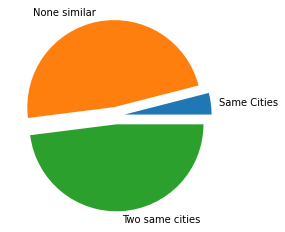

In [26]:
y = np.array([counter1, counter2, counter3])
labels = ['Same Cities', 'None similar', 'Two same cities']
explode = [0.1, 0.1, 0.1]
plt.pie(y, labels=labels, explode=explode)
plt.show() 

Disctete distribution as the number of cities is a quantifiable.

Univariate as the assessment and statistical analysis is based on the number of people going to the same city. 